Predicting the Total Call centre forecast till 26th of May 2023

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import math
#import tensorflow.compat.v1.losses.sparse_softmax_cross_entropy as tf
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv(r"C:\Users\Fredrick.Alli\OneDrive - Badger Medical\TTCC.csv")

In [3]:
data.head()

,Date,Total Cases
0,01/01/2022,411
1,02/01/2022,408
2,03/01/2022,435
3,04/01/2022,200
4,05/01/2022,242


In [4]:
data.tail()

,Date,Total Cases
808,20/03/2024,290
809,21/03/2024,228
810,22/03/2024,236
811,23/03/2024,642
812,24/03/2024,409


In [6]:
#To check for duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
808    False
809    False
810    False
811    False
812    False
Length: 813, dtype: bool

<Axes: >

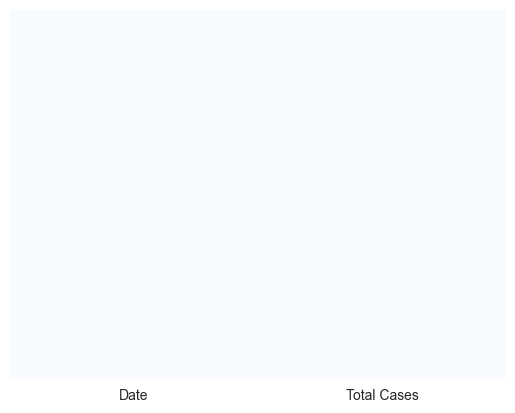

In [15]:
#To check for missing values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [16]:
#Finding general statistics
data.describe()

,Total Cases
count,813.000000
mean,284.359164
std,156.403943
min,0.000000
25%,199.000000
50%,241.000000
75%,381.000000
max,1066.000000


array([[<Axes: title={'center': 'Total Cases'}>]], dtype=object)

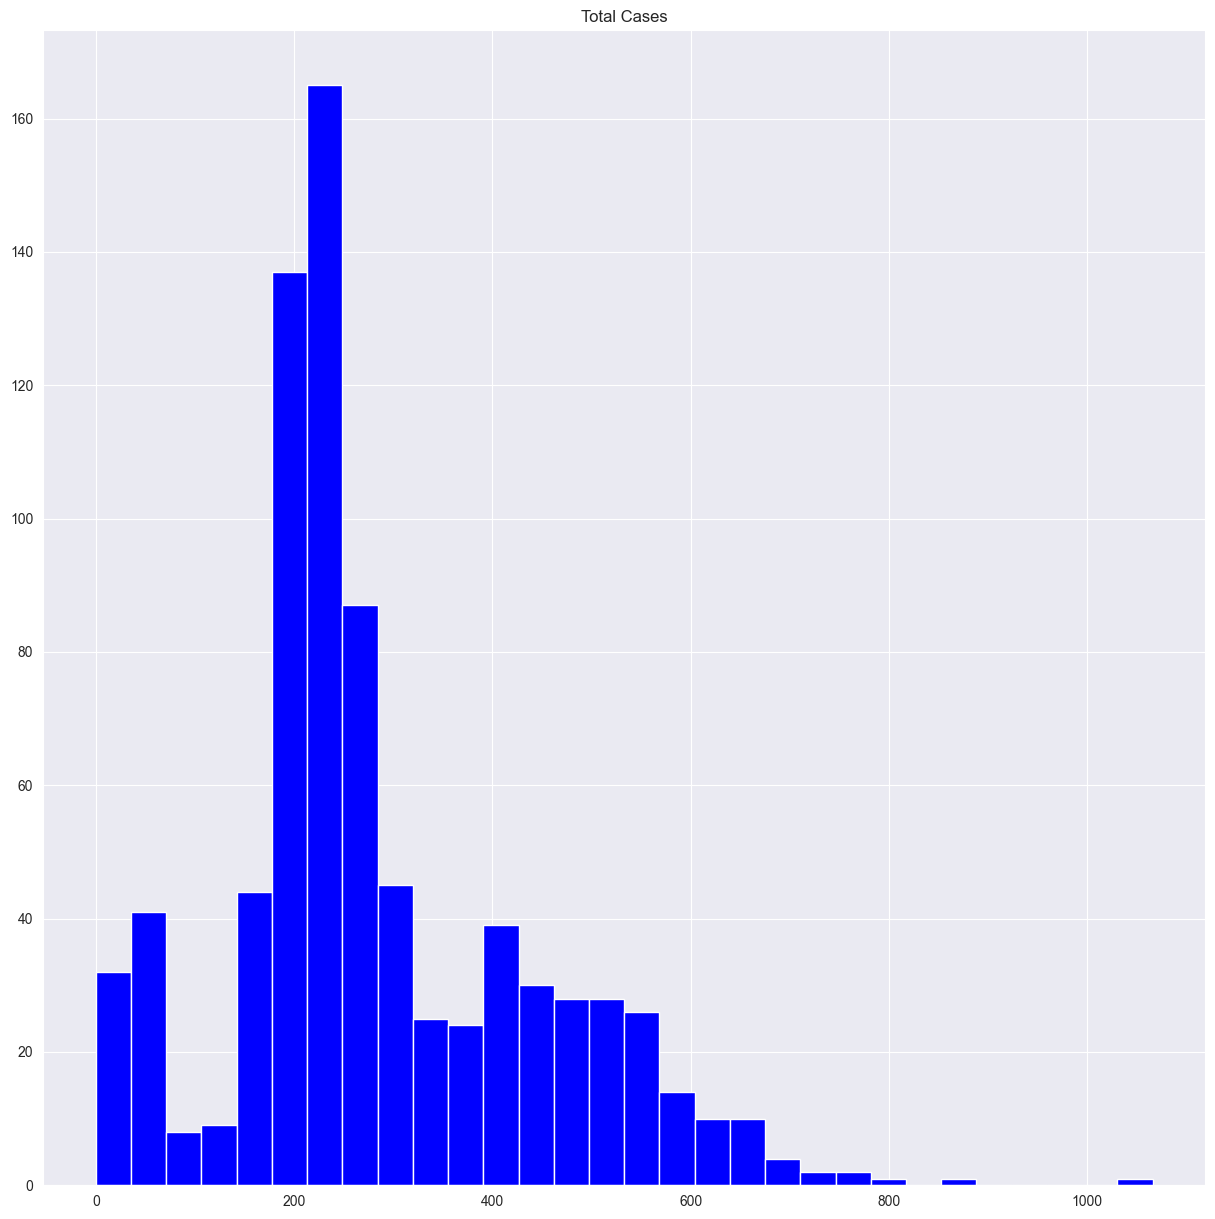

In [17]:
#Histogram of the plot
data.hist(bins=30, figsize=(15,15), color="b")

In [18]:
#To see the data types 
data.dtypes 

Date           object
Total Cases     int64
dtype: object

In [20]:
#Convert "Date" column data type from object to datatime 

data["Date"]=pd.to_datetime(data["Date"], format="%d/%m/%Y")

In [21]:
#To see if the data types hve changed
data.dtypes

Date           datetime64[ns]
Total Cases             int64
dtype: object

Plotting the data to see the trends

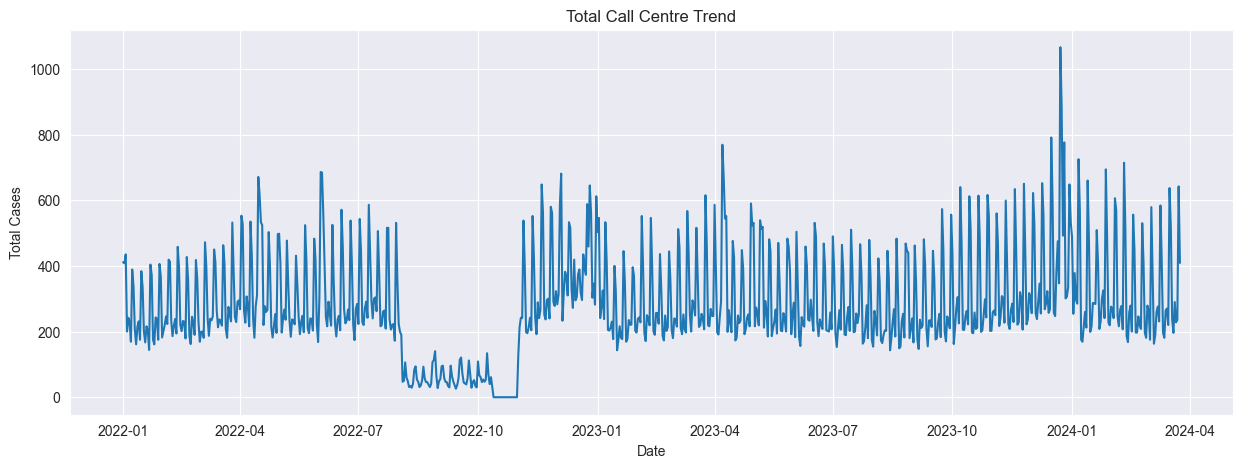

In [24]:
#setting the plot size 
plt.figure(figsize=(15,5))

color_pal = sns.color_palette()

#Plotting the data 
#Using trendline for the line style and marker for data point style 
plt.plot(data["Date"], data["Total Cases"], linestyle="-", color=color_pal[0])

#Adding grid line for better readability 
plt.grid(True)

#plot the title 
plt.ylabel("Total Cases")
plt.xlabel("Date")
plt.title("Total Call Centre Trend")

#Show the plot
plt.show()


Testing for stationarlity 

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
test_results = adfuller(data["Total Cases"])

In [32]:
#it is stationary 
#it is non-stationary 

def adfuller_test(Total_Cases):
    result = adfuller(Total_Cases)
    labels = ["ADF", "p-value", "Lags used", "Number of observations used"]
    for value, label in zip(result, labels):
        print(f"{label}: {value}")
    if result[1] <=0.05:
        print("Strong evidence against the null hypothesis(0), reject the null hypothesis. Data has no unit root is stationary")
    else: print("Weak evidence against the null hypothesis, time series has no unit root, indicating it is not stationary")

In [33]:
adfuller_test(data["Total Cases"])

ADF: -2.6728038098709104
p-value: 0.07886378404936789
Lags used: 21
Number of observations used: 791
Weak evidence against the null hypothesis, time series has no unit root, indicating it is not stationary


The hypothesis means the data is non-stationary because it is >0.05

Now, the data is non-stationary there are seven things that I could do. #

Differencing the data: One common method to achieve stationarity is to difference the data. This involves substracting the previous observation from the current observation. Sometimes, more than one round of differencing may be required. 

Transformation: Applying transformation such as lograrithmic square root or box-cox transformation can also help stabilise the variance of the time series and make it more stationary. 

Removing trends and seasonality: If the non-stationarity is due to a trend or seasonality, you might consider detrending or deaseasonalising the dara. This can be done by model fitting or by using methods like Seasonal Decomposition. 

Model Building: Once the data is stationary, proceed to build time series forecasting models such as ARIMA and SARIMA or machine learning models depending on the nature of your data and the specific requirements of my analysis. 

Model Validation: Validating the model by checking its performance on unseen data. Use metrics like RMSE, MAE, OR MAPE to evaluate the forecasting accuracy 



Forecasting: Use of validating models to forecast values 

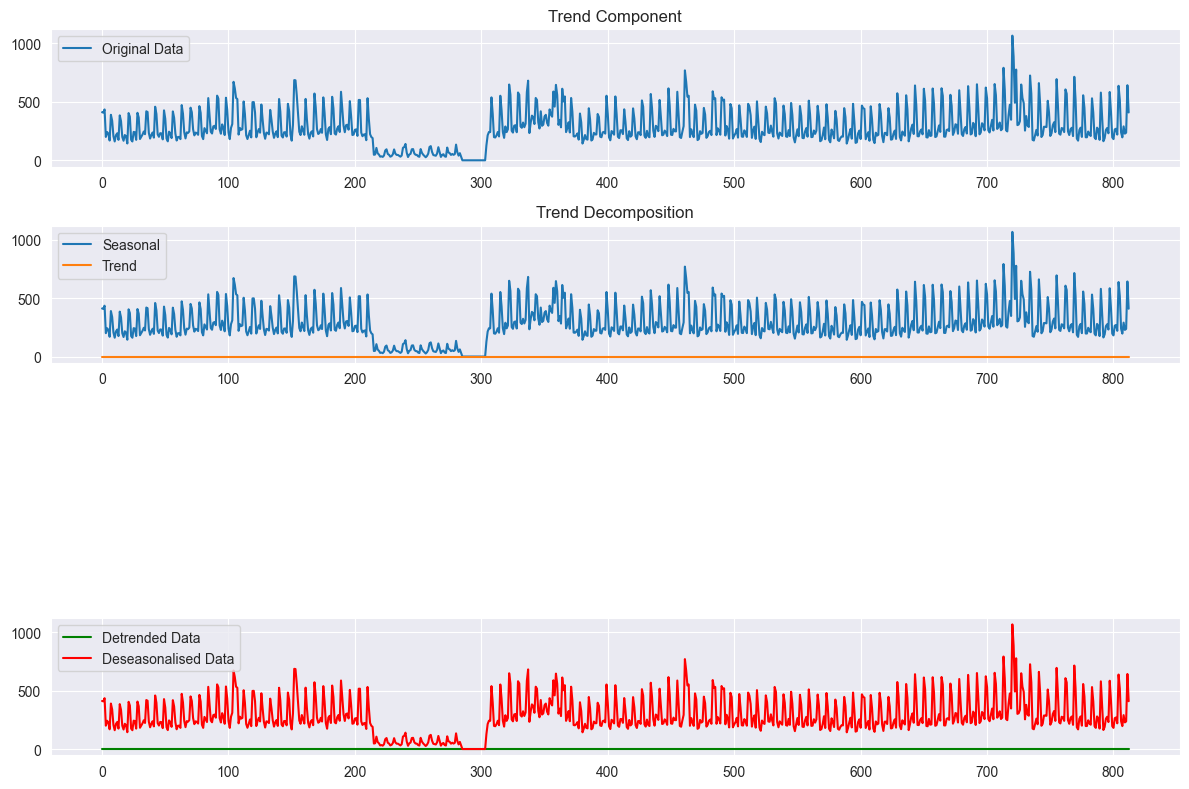

In [34]:
import statsmodels.api as sm

#Assuming you have your time series data in a variable called "Total Cases"
#You can use pandas to create a time series object if it is not already 

Total_Cases = pd.Series(data["Total Cases"])

#To manually specify the frequency (assuming daily data)
period = 1

#Seasonality Decomposition using STL 
decomposition = sm.tsa.seasonal_decompose(Total_Cases, model="additive", period=period)

#Detrend the data 
detrended_data = Total_Cases - decomposition.trend

#Deseasonalised data 
deseasonalised_data = Total_Cases - decomposition.seasonal

#Plt the original, trend, seasonalised and detrended/deseasonalised data 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.plot(Total_Cases, label="Original Data")
plt.legend(loc="upper left")
plt.title("Trend Component")

plt.subplot(4,1,2)
plt.plot(decomposition.trend, label="Seasonal")
plt.legend(loc="upper left")
plt.title("Seasonal Decomposition")


plt.subplot(4,1,2)
plt.plot(decomposition.seasonal, label="Trend")
plt.legend(loc="upper left")
plt.title("Trend Decomposition")

plt.subplot(4,1,4)
plt.plot(detrended_data, label="Detrended Data", color="green")
plt.plot(deseasonalised_data, label="Deseasonalised Data", color="Red")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

Now the data has been detrended and the ADF tests results could be printed out 

In [36]:
from statsmodels.tsa.stattools import adfuller

#Perform ADF test on the detrended and deseasonalised data 
adf_result = adfuller(deseasonalised_data)

#Extract and print the ADF test statistics 
adf_statistic = adf_result[0]
p_value = adf_result[1]
lags_used =  adf_result[2]#
obs_used =  adf_result[3]

print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print(f"lags_used: {lags_used}")
print(f"Number of Observations Used: {obs_used}")

#interpret the results
if p_value < 0.05:
    print("Strong evidence against the null hypothesis(0), reject the null hypothesis. Data has no unit root; it is stationary")
else: 
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")


ADF Statistic: -2.6728038098709104
p-value: 0.07886378404936789
lags_used: 21
Number of Observations Used: 791
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


data["Total Cases"].plot(kind="line")

Use of Auto-regressive Model 

In [38]:
#Now I need to do auto correlation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p, d, q

p stands for AR model lags
q stands for moving average lag
d stands for differencing


Plotting the acf and pacf

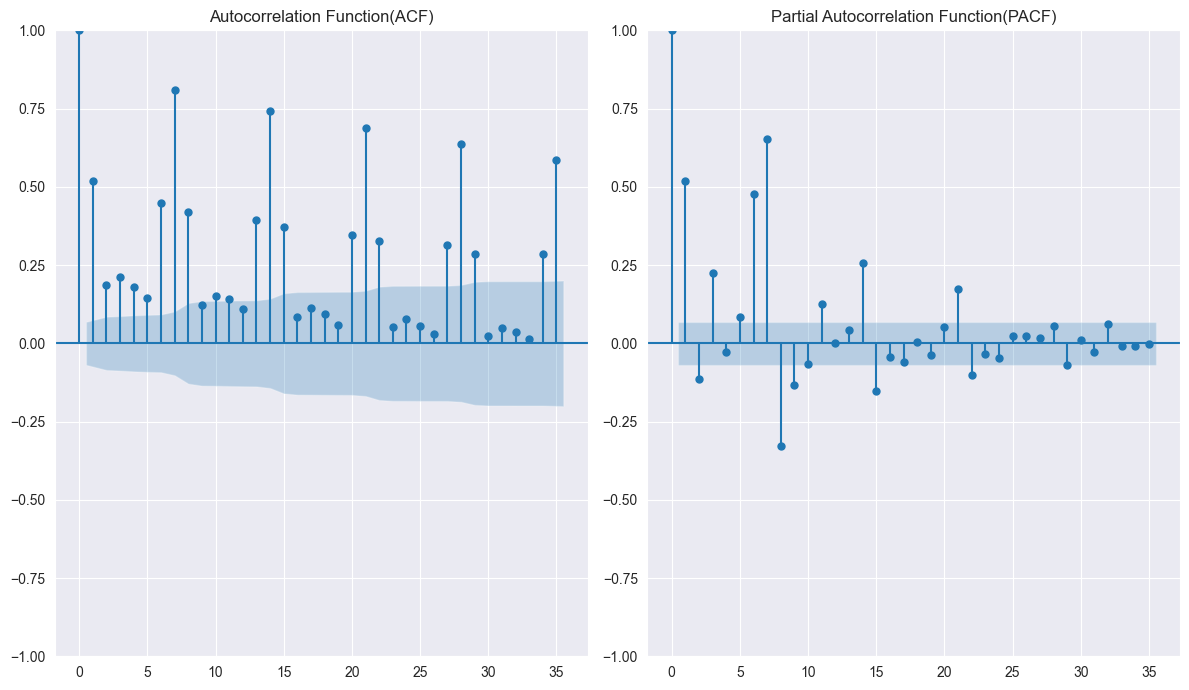

In [39]:
#Plotting the Autocorrelation function (ACF)
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plot_acf(deseasonalised_data, lags=35, ax=plt.gca())
plt.title("Autocorrelation Function(ACF)")

#Plotting the partial autocorrelation function (PACF)
plt.subplot(1,2,2)
plot_pacf(deseasonalised_data, lags=35, ax=plt.gca())
plt.title("Partial Autocorrelation Function(PACF)")

plt.tight_layout()
plt.show()

Final Steps 

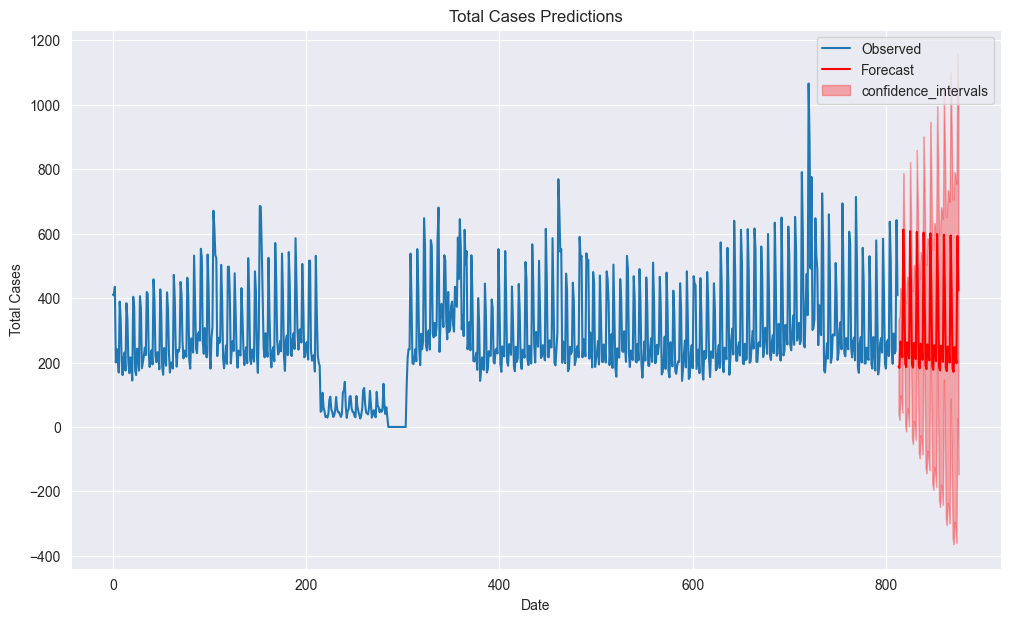

In [42]:
#Define SARIMA hyperparameters(p,d,q,P,D,Q,s)
p=1 #AR orders
d=1 #Integration order
q=1 #MA orders
P=1 #Seasonal AR orders
D=1 #Seasonal Integration orders
Q=1 #Seasonal MA orders
s=7 #Seasonal period (assuming weekly data)

#Fit the SARIMA model 
sarima_model = sm.tsa.SARIMAX(data["Total Cases"], order=(p,d,q), seasonal_order=(P,D,Q,s))
sarima_result = sarima_model.fit()

#Forecast future Total Cases 
forecast_steps = 63 #Adjust as needed 
forecast = sarima_result.get_forecast(steps=forecast_steps)

#Get the forecasted values, confidence intervals, and prediction intervals 
forecasted_values = forecast.predicted_mean 
confidence_intervals = forecast.conf_int()
lower_bound = confidence_intervals["lower Total Cases"]
upper_bound = confidence_intervals["upper Total Cases"]

#plot the forecast 
plt.figure(figsize=(12,7))
plt.plot(data.index, data["Total Cases"], label="Observed")
plt.plot(forecasted_values.index, forecasted_values, color="red", label="Forecast")
plt.fill_between(forecasted_values.index, lower_bound, upper_bound, color="red", alpha=0.3, label="confidence_intervals")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Total Cases Predictions")
plt.legend()
plt.show()

In [43]:
# print the forecast values 
print("Forecasted Values:")
print(forecasted_values)

#Print the confidence intervals 
print("\nConfidence Intervals:")
print(confidence_intervals)

#print the lower bounds 
print("\nLower Bounds:")
print(lower_bound)

#print the upper bounds 
print("\nUpper Bounds:")
print(upper_bound)

Forecasted Values:
813    187.262836
814    183.175514
815    265.194088
816    247.383358
817    216.745016
          ...    
871    247.744459
872    233.566654
873    197.897339
874    592.505754
875    423.875126
Name: predicted_mean, Length: 63, dtype: float64

Confidence Intervals:
     lower Total Cases  upper Total Cases
813          42.966357         331.559315
814          22.411560         343.939469
815          98.605525         431.782652
816          77.443976         417.322740
817          44.205262         389.284770
..                 ...                ...
871        -295.349631         790.838549
872        -316.882684         784.015992
873        -359.652961         755.447640
874          28.000946        1157.010561
875        -147.478679         995.228930

[63 rows x 2 columns]

Lower Bounds:
813     42.966357
814     22.411560
815     98.605525
816     77.443976
817     44.205262
          ...    
871   -295.349631
872   -316.882684
873   -359.652961
874    

In [44]:
# Print all the forecasted values
print("Forecasted Values:")
print(forecasted_values.to_string())

# Print all the confidence intervals
print("\nConfidence Intervals:")
print(confidence_intervals.to_string())

# Print all the lower and upper bounds
print("\nLower Bounds:")
print(lower_bound.to_string())
print("\nUpper Bounds:")
print(upper_bound.to_string())

Forecasted Values:
813    187.262836
814    183.175514
815    265.194088
816    247.383358
817    216.745016
818    612.720114
819    437.470885
820    195.490699
821    185.634357
822    262.810504
823    248.256601
824    213.110369
825    607.860927
826    438.542838
827    194.434687
828    183.969746
829    260.639415
830    246.422544
831    210.807566
832    605.430746
833    436.728706
834    192.399483
835    181.871313
836    258.488367
837    244.306504
838    208.642834
839    603.252782
840    434.614736
841    190.262548
842    179.727809
843    256.339398
844    242.161172
845    206.492443
846    601.101017
847    432.469619
848    188.115045
849    177.579624
850    254.190645
851    240.012797
852    204.343543
853    598.951974
854    430.321266
855    185.966444
856    175.430953
857    252.041915
858    237.864105
859    202.194797
860    596.803213
861    428.172577
862    183.817730
863    173.282231
864    249.893187
865    235.715381
866    200.046067
867    59